In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
%store -r data_frame
df = data_frame

In [3]:
print(df.columns.unique())
df

Index(['rt', 'responses', 'type', 'trial_type', 'trial_index', 'time_elapsed',
       'internal_node_id', 'uniqueid', 'stimulus', 'key_press',
       'button_pressed', 'block_number', 'left_word_study', 'right_word_study',
       'trial_period', 'left_word_test', 'right_word_test', 'chosen_side',
       'comparison_type', 'left_comp_type', 'right_comp_type', 'correct_side',
       'subj_wrote_words'],
      dtype='object')


,rt,responses,type,trial_type,trial_index,time_elapsed,internal_node_id,uniqueid,stimulus,key_press,...,right_word_study,trial_period,left_word_test,right_word_test,chosen_side,comparison_type,left_comp_type,right_comp_type,correct_side,subj_wrote_words
468,8720.700,"{""name"":""David""}",NAME,survey-html-form,0,8725,0.0-0.0-0.0,A110BZSDZN7E16:32ZKVD547GU1HJNJQ1ECIAEZKLVB3U,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
469,224436.300,NaN,NaN,html-keyboard-response,1,233379,0.0-1.0,A110BZSDZN7E16:32ZKVD547GU1HJNJQ1ECIAEZKLVB3U,Welcome to the <strong>Judgment of Recency</st...,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,40190.900,NaN,NaN,html-button-response,2,273777,0.0-2.0-0.0,A110BZSDZN7E16:32ZKVD547GU1HJNJQ1ECIAEZKLVB3U,<p class='inst-justified'>According to Wikiped...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
471,3923.700,NaN,NaN,html-button-response,3,277707,0.0-2.0-1.0,A110BZSDZN7E16:32ZKVD547GU1HJNJQ1ECIAEZKLVB3U,<p class='inst'>How often do you realize you'v...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,92133.900,NaN,NaN,html-keyboard-response,4,369849,0.0-3.0,A110BZSDZN7E16:32ZKVD547GU1HJNJQ1ECIAEZKLVB3U,"<p>In this experiment, you will encounter a nu...",,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149226,NaN,NaN,NaN,html-keyboard-response,454,2531604,0.0-445.0,AZZA3J049G7R5:3300DTYQT3ORVN55Y3SYWQDVWFGEQ3,"<h1 style=""font-size: 35px"">ROD</h1><h1 style=...",None,...,SHELF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149227,3274.665,NaN,NaN,html-keyboard-response,455,2535632,0.0-446.0,AZZA3J049G7R5:3300DTYQT3ORVN55Y3SYWQDVWFGEQ3,"<h1 style=""font-size: 35px;"">COWBOY<span style...",z,...,NaN,test,COWBOY,STICKER,0.0,"[68, many]",many,68,1.0,NaN
149228,NaN,NaN,NaN,html-keyboard-response,456,2540386,0.0-447.0,AZZA3J049G7R5:3300DTYQT3ORVN55Y3SYWQDVWFGEQ3,"<h1 style=""font-size: 35px"">SKETCH</h1><h1 sty...",None,...,PLAYGROUND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149229,1855.460,NaN,NaN,html-keyboard-response,457,2542996,0.0-448.0,AZZA3J049G7R5:3300DTYQT3ORVN55Y3SYWQDVWFGEQ3,"<h1 style=""font-size: 35px;"">CRATER<span style...",/,...,NaN,test,CRATER,GANGSTER,1.0,"[16, 68]",68,16,1.0,NaN


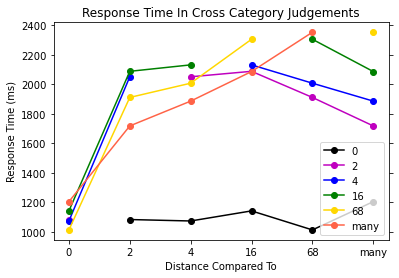

In [4]:
comparisons = [(0, 2), (0, 4), (0, 16), (0, 68), (0, "many"), (2, 4), (2, 16), (2, 68), (2, "many"), (4, 16), (4, 68), (4, "many"), (16, 68), (16, "many"), (68, "many")]
distances = [0, 2, 4, 16, 68, 'many']
# For different graph look reverse distances list (make sure to alter elif statment in graph_for_distance func)
#distances.reverse()

def average_for_comp(df, comp):
    ordered = df[df['left_comp_type'] == comp[0]]
    ordered = ordered[ordered['right_comp_type'] == comp[1]]
    inverse = df[df['left_comp_type'] == comp[1]]
    inverse = inverse[inverse['right_comp_type'] == comp[0]]
    temp = pd.concat([ordered, inverse])
    corr = temp[temp['correct_side'] == temp['chosen_side']]
    return corr["rt"].mean()

def graph_for_distance(index, comparisons, distances, df):
    # for each comparison for this distance (i.e. 4 and 16) add the average to the y array in order (FOR COMP = DISTANCE, set to 0.5)
    y = []
    for i in range(len(distances)):
        y.append(average_for_comp(df, [distances[index], distances[i]]))

    x = distances

    # graph the line:
    color = 'black'
    marker = 'o'
    
    colors = ['black', 'm', 'blue', 'green', 'gold', 'tomato']
    color = colors[index]
    #markers = ['o', 'v', 's', 'P', 'd', 'X' ]
    #marker = markers[index]

    # Graph line
    ax.plot(x, y, clip_on = False, color = color, marker = marker, label=distances[index])

fig, ax = plt.subplots()
plt.title('Response Time In Cross Category Judgements')
plt.ylabel('Response Time (ms)')
plt.xlabel('Distance Compared To')
#plt.xticks(range(0, len(distances)))
#plt.ylim(0, 1)
#plt.yticks(np.linspace(0,1,11))
ax.yaxis.set_ticks_position('both')

for i in range(len(distances)):
    graph_for_distance(i, comparisons, distances, df)

plt.legend()
plt.show()

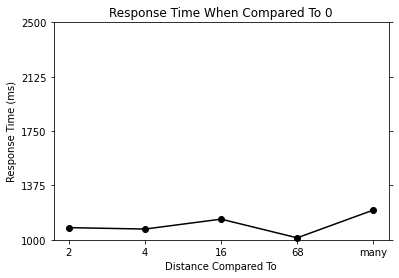

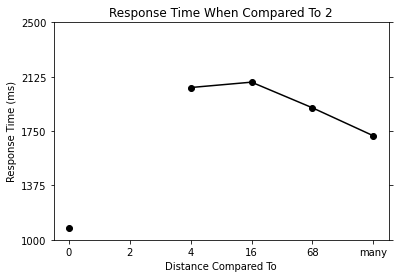

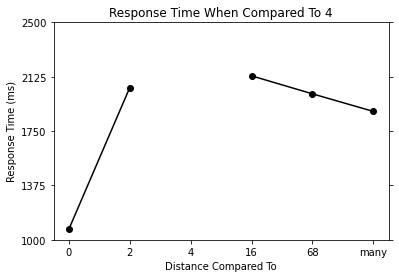

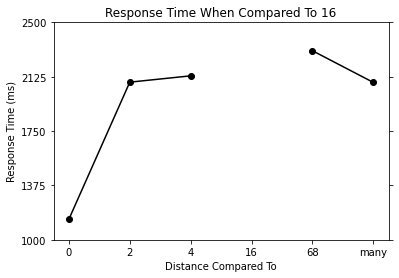

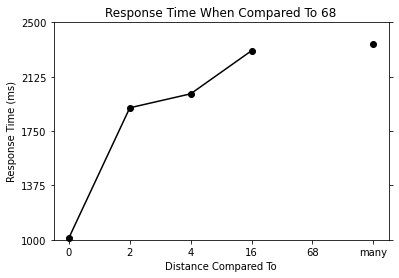

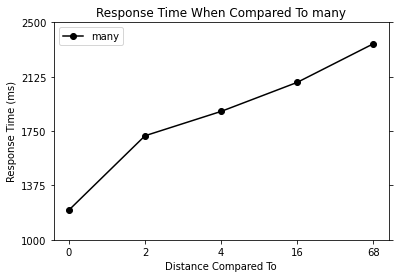

In [5]:
comparisons = [(0, 2), (0, 4), (0, 16), (0, 68), (0, "many"), (2, 4), (2, 16), (2, 68), (2, "many"), (4, 16), (4, 68), (4, "many"), (16, 68), (16, "many"), (68, "many")]
distances = [0, 2, 4, 16, 68, 'many']
# For different graph look reverse distances list (make sure to alter elif statment in graph_for_distance func)
#distances.reverse()

def average_for_comp(df, comp):
    ordered = df[df['left_comp_type'] == comp[0]]
    ordered = ordered[ordered['right_comp_type'] == comp[1]]
    inverse = df[df['left_comp_type'] == comp[1]]
    inverse = inverse[inverse['right_comp_type'] == comp[0]]
    temp = pd.concat([ordered, inverse])
    corr = temp[temp['correct_side'] == temp['chosen_side']]
    return corr["rt"].mean()

def graph_for_distance(index, comparisons, distances, df):
    # for each comparison for this distance (i.e. 4 and 16) add the average to the y array in order (FOR COMP = DISTANCE, set to 0.5)
    y = []
    for i in range(len(distances)):
        y.append(average_for_comp(df, [distances[index], distances[i]]))
    return y

    

    

for i in range(len(distances)):
    y = graph_for_distance(i, comparisons, distances, df)
    # Graph line
    fig, ax = plt.subplots()
    plt.title('Response Time When Compared To ' + str(distances[i]))
    plt.ylabel('Response Time (ms)')
    plt.xlabel('Distance Compared To')
    plt.ylim(1000, 2500)
    plt.yticks(np.linspace(1000,2500,5))
    ax.yaxis.set_ticks_position('both')
    # graph the line:
    color = 'black'
    marker = 'o'
    
    #colors = ['black', 'm', 'blue', 'green', 'gold', 'tomato']
    #color = colors[i]
    color = 'black'
    #markers = ['o', 'v', 's', 'P', 'd', 'X' ]
    #marker = markers[index]
    ax.plot(distances, y, clip_on = False, color = color, marker = marker, label=distances[i])
    
plt.legend()
plt.show()

In [6]:
#Separation Graph
def ave_rt():
    comparisons = [(0, 2), (0, 4), (0, 16), (0, 68), (0, "many"), (2, 4), (2, 16), (2, 68), (2, "many"), (4, 16), (4, 68), (4, "many"), (16, 68), (16, "many"), (68, "many")]
    distances = [0, 2, 4, 16, 68, 'many']
    
    def compute_rt(comps):
        ave_rt = 0
        number = 0
        for i in comps:
            ordered = df[df['left_comp_type'] == i[0]]
            ordered = ordered[ordered['right_comp_type'] == i[1]]
            inverse = df[df['left_comp_type'] == i[1]]
            inverse = inverse[inverse['right_comp_type'] == i[0]]
            temp = pd.concat([ordered, inverse])
            # QUESTION: does you only use correct answers in response times analyses?
            corr = temp[temp['correct_side'] == temp['chosen_side']]
            ave_rt += corr["rt"].mean()
            number += 1
        return ave_rt/number
    
    def paired_sort(sort, follow):
        
        # Exception
        if len(sort) != len(follow):
            raise ValueError("Lists must be the same length...")
        
        comps = []
        completed = []
        for index, i in enumerate(sort):
            put = False
            
            for jndex, j in enumerate(completed):
                if i < j[0]:
                    completed.insert(jndex, [i])
                    
                    comps.insert(jndex, [follow[index]])
                    
                    put = True
                    break
                
                if i == j[0]:
                    temp = completed.pop(jndex)
                    temp.append(i)
                    completed.insert(jndex, temp)
                    
                    temp = comps.pop(jndex)
                    temp.append(follow[index])
                    comps.insert(jndex, temp)
                    
                    put = True
                    break
                    
            if not put:
                completed.append([i])
                comps.append([follow[index]])
        
        return comps
            
    
    #Get separations in each comparison
    separations = []
    for i in comparisons:
        if i[1] != "many":
            separations.append(i[1] - i[0])
        else:
            separations.append(100)
    
    #Sort separations from smallest to largest
    comparisons = paired_sort(separations, comparisons)
    comparisons.insert(0, (comparisons.pop(1) + comparisons.pop(0)))
    comparisons.insert(1, (comparisons.pop(3) + comparisons.pop(2) + comparisons.pop(1)))
    comparisons.insert(2, (comparisons.pop(5) + comparisons.pop(4) + comparisons.pop(3) + comparisons.pop(2)))
    for i in comparisons:
        print(i)
                       
    #Set up graph
    fig, ax = plt.subplots()
    plt.title('Response Times By Distance Apart')
    plt.ylabel('Response Time (ms)')
    plt.xlabel('Distance Apart')
    plt.xticks([25, 50, 75, 100], ["close", "mid", "far", "many"])
    #plt.xticks([2, 4, 12, 14, 16, 52, 64, 66, 68, 100], [2, 4, 12, 14, 16, 52, 64, 66, 68, 'many'])
    plt.xticks()
    #plt.ylim(0, 1)
    #plt.yticks(np.linspace(0,1,11))
    ax.yaxis.set_ticks_position('both')
    
    #Compute response time for each separation and graph them
    x = [25, 50, 75, 100]
    y = []
    for i in comparisons:
        y.append(compute_rt(i))
    ax.plot(x, y)

[(0, 4), (0, 2), (2, 4)]
[(0, 16), (2, 16), (4, 16)]
[(0, 68), (2, 68), (4, 68), (16, 68)]
[(0, 'many'), (2, 'many'), (4, 'many'), (16, 'many'), (68, 'many')]


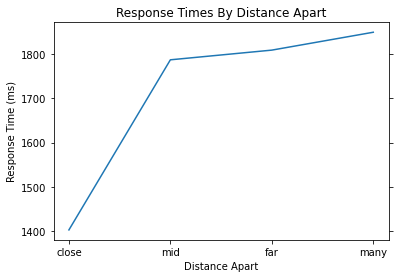

In [7]:
ave_rt()

In [8]:
#Separation Graph
def order_rts():
    comparisons = [(0, "many"), (0, 68), (0, 16), (0, 4), (0, 2), (2, "many"), (2, 68), (2, 16), (2, 4), (4, "many"), (4, 68), (4, 16), (16, "many"), (16, 68), (68, "many")]
    distances = [0, 2, 4, 16, 68, 'many']
    
    def compute_rt(comps):
        ordered = df[df['left_comp_type'] == i[0]]
        ordered = ordered[ordered['right_comp_type'] == i[1]]
        inverse = df[df['left_comp_type'] == i[1]]
        inverse = inverse[inverse['right_comp_type'] == i[0]]
        temp = pd.concat([ordered, inverse])
        corr = temp[temp['correct_side'] == temp['chosen_side']]
        ave_rt = corr["rt"].mean()
        return ave_rt
    
    def paired_sort(sort, follow):
        
        # Exception
        if len(sort) != len(follow):
            raise ValueError("Lists must be the same length...")
        
        comps = []
        completed = []
        for index, i in enumerate(sort):
            put = False
            
            for jndex, j in enumerate(completed):
                if i < j[0]:
                    completed.insert(jndex, [i])
                    
                    comps.insert(jndex, [follow[index]])
                    
                    put = True
                    break
                
                if i == j[0]:
                    temp = completed.pop(jndex)
                    temp.append(i)
                    completed.insert(jndex, temp)
                    
                    temp = comps.pop(jndex)
                    temp.append(follow[index])
                    comps.insert(jndex, temp)
                    
                    put = True
                    break
                    
            if not put:
                completed.append([i])
                comps.append([follow[index]])
        
        return comps
    
    y = []
    for i in comparisons:
        y.append(compute_rt(i))
    bleh = paired_sort(y, comparisons)
    for i in bleh:
        print(i)
    print(bleh)

In [9]:
order_rts()

[(0, 68)]
[(0, 4)]
[(0, 2)]
[(0, 16)]
[(0, 'many')]
[(2, 'many')]
[(4, 'many')]
[(2, 68)]
[(4, 68)]
[(2, 4)]
[(16, 'many')]
[(2, 16)]
[(4, 16)]
[(16, 68)]
[(68, 'many')]
[[(0, 68)], [(0, 4)], [(0, 2)], [(0, 16)], [(0, 'many')], [(2, 'many')], [(4, 'many')], [(2, 68)], [(4, 68)], [(2, 4)], [(16, 'many')], [(2, 16)], [(4, 16)], [(16, 68)], [(68, 'many')]]


In [10]:
#Separation Graph
def rts_graphed(comparisons, distance):
    
    def compute_rt(comp):
        ordered = df[df['left_comp_type'] == comp[0]]
        ordered = ordered[ordered['right_comp_type'] == comp[1]]
        inverse = df[df['left_comp_type'] == comp[1]]
        inverse = inverse[inverse['right_comp_type'] == comp[0]]
        temp = pd.concat([ordered, inverse])
        corr = temp[temp['correct_side'] == temp['chosen_side']]
        rt = corr["rt"].mean()
        return rt

                       
    #Set up graph
    fig, ax = plt.subplots()
    plt.title('Response Times By Distance From ' + str(distance))
    plt.ylabel('Response Time (ms)')
    plt.xlabel('Distance Apart')
    x = list(range(0, len(comparisons)))
    plt.xticks(x, comparisons)
    plt.xticks()
    ax.yaxis.set_ticks_position('both')
    
    #Compute response time for each separation and graph them
    
    y = []
    for i in comparisons:
        y.append(compute_rt(i))
    ax.plot(x, y, marker='o')

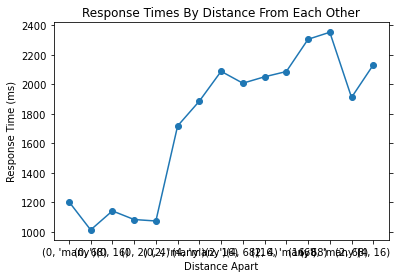

In [11]:
ordered = [(0, 'many'), (0, 68), (0, 16), (0, 2), (0, 4), (2, 'many'), (4, 'many'), (2, 16), (4, 68), (2, 4), (16, 'many'), (16, 68), (68, 'many'), (2, 68), (4, 16)]
rts_graphed(ordered, "Each Other")

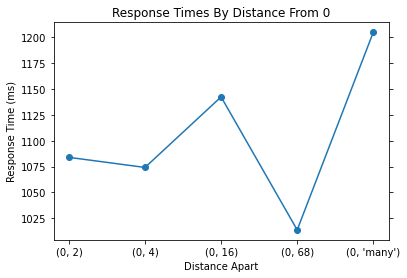

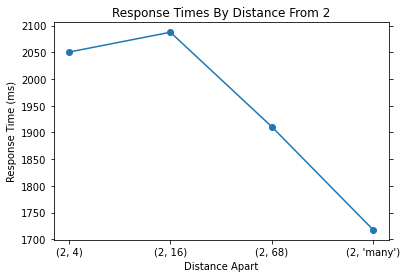

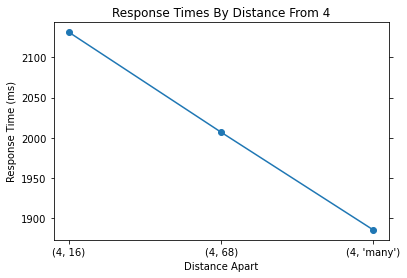

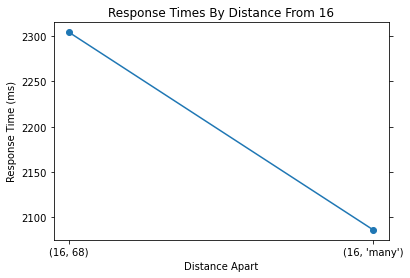

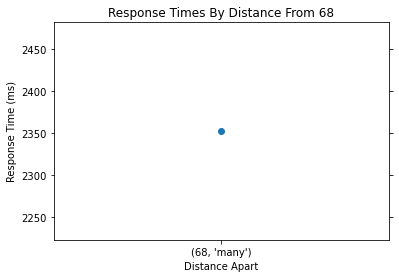

In [12]:
comparisons = [[(0, 2), (0, 4), (0, 16), (0, 68), (0, "many")], [(2, 4), (2, 16), (2, 68), (2, "many")], [(4, 16), (4, 68), (4, "many")], [(16, 68), (16, "many")], [(68, "many")]]
distances = [0, 2, 4, 16, 68, 'many']
for index, i in enumerate(comparisons):
    rts_graphed(i, distances[index])
    

In [13]:
#Separation Graph
def grouped_rts_graphed():
    
    comparisons = [[(0, 2), (0, 4), (0, 16), (0, 68), (0, "many")], [ -1, (2, 4), (2, 16), (2, 68), (2, "many")], [ -1, -1, (4, 16), (4, 68), (4, "many")], [-1, -1, -1, (16, 68), (16, "many")], [-1, -1, -1, -1, (68, "many")]]
    distances = [2, 4, 16, 68, 'many']
    labels = [0, 2, 4, 16, 68]
    
    def compute_rt(comp):
        ordered = df[df['left_comp_type'] == comp[0]]
        ordered = ordered[ordered['right_comp_type'] == comp[1]]
        inverse = df[df['left_comp_type'] == comp[1]]
        inverse = inverse[inverse['right_comp_type'] == comp[0]]
        temp = pd.concat([ordered, inverse])
        corr = temp[temp['correct_side'] == temp['chosen_side']]
        rt = corr["rt"].mean()
        return rt


    #Set up graph
    fig, ax = plt.subplots()
    plt.title('Response Times By Comparison Between Item Distances')
    plt.ylabel('Response Time (ms)')
    plt.xlabel('Item Distance Compared to')
    x = list(range(0, len(distances)))
    plt.xticks(x, distances)
    plt.xticks()
    ax.yaxis.set_ticks_position('both')

    #Compute response time for each separation and graph them
    for index, i in enumerate(comparisons):
        x = list(range(0, len(distances)))
        y = []
        for j in i:
            if j == -1:
                y.append(0)
            else:
                y.append(compute_rt(j))
            
        for i in range(index):
            x.pop(0)
            y.pop(0)
        ax.plot(x, y, marker='o', label = str(labels[index]))
    
    plt.legend()
    plt.show()


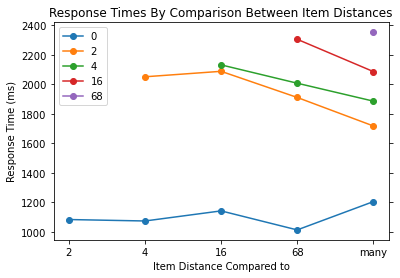

In [14]:
grouped_rts_graphed()